In [1]:
import datetime
from scipy import io
import os
import seaborn as sns
from scipy.io import loadmat
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path_parent = '../Data'
dataframes = []

In [3]:
for folder in os.listdir(path_parent):
    folder_path = os.path.join(path_parent, folder)
    if os.path.isdir(folder_path):
        #print(folder_path)
        dfs = []
        for file in os.listdir(folder_path):
            if file.endswith('.mat'):
                #print(file)
                mat_file = glob.glob(os.path.join(folder_path, file))
                print(mat_file)

['../Data/ARC1/B0005.mat']
['../Data/ARC1/B0006.mat']
['../Data/ARC1/B0007.mat']
['../Data/ARC1/B0018.mat']
['../Data/ARC2/B0025.mat']
['../Data/ARC2/B0026.mat']
['../Data/ARC2/B0027.mat']
['../Data/ARC2/B0028.mat']
['../Data/ARC3/B0025.mat']
['../Data/ARC3/B0026.mat']
['../Data/ARC3/B0027.mat']
['../Data/ARC3/B0028.mat']
['../Data/ARC3/B0029.mat']
['../Data/ARC3/B0030.mat']
['../Data/ARC3/B0031.mat']
['../Data/ARC3/B0032.mat']
['../Data/ARC3/B0033.mat']
['../Data/ARC3/B0034.mat']
['../Data/ARC3/B0036.mat']
['../Data/ARC3/B0038.mat']
['../Data/ARC3/B0039.mat']
['../Data/ARC3/B0040.mat']
['../Data/ARC3/B0041.mat']
['../Data/ARC3/B0042.mat']
['../Data/ARC3/B0043.mat']
['../Data/ARC3/B0044.mat']
['../Data/ARC4/B0045.mat']
['../Data/ARC4/B0046.mat']
['../Data/ARC4/B0047.mat']
['../Data/ARC4/B0048.mat']
['../Data/ARC5/B0049.mat']
['../Data/ARC5/B0050.mat']
['../Data/ARC5/B0051.mat']
['../Data/ARC5/B0052.mat']
['../Data/ARC6/B0053.mat']
['../Data/ARC6/B0054.mat']
['../Data/ARC6/B0055.mat']
[

In [4]:
folder_path

'../Data/ARC6'

In [5]:
Data_Dir = '../Data/ARC1/'
mat_files = Data_Dir + '*.mat'
labels = []

In [6]:
mat_files = glob.glob(os.path.join(Data_Dir, '*.mat'))

In [7]:
if not mat_files:
    print("No .mat")
    exit()

In [8]:
labels = [loadmat(mat_file) for mat_file in mat_files]
dataset = []
capacity_data = []
counter = 0

In [20]:
for label in labels:
    for battery_key in ['B0005', 'B0006', 'B0007', 'B0008']: 
        if battery_key in label:
            battery_data = label[battery_key][0, 0]  
            for i in range(len(battery_data['cycle'][0])):
                row = battery_data['cycle'][0, i]
                if row['type'][0] == 'discharge':
                    ambient_temperature = row['ambient_temperature'][0][0]
                    date_time = datetime.datetime(int(row['time'][0][0]),
                                                  int(row['time'][0][1]),
                                                  int(row['time'][0][2]),
                                                  int(row['time'][0][3]),
                                                  int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
                    data = row['data']
                    capacity = data[0][0]['Capacity'][0][0]
                    for j in range(len(data[0][0]['Voltage_measured'][0])):
                        voltage_measured = data[0][0]['Voltage_measured'][0][j]
                        current_measured = data[0][0]['Current_measured'][0][j]
                        temperature_measured = data[0][0]['Temperature_measured'][0][j]
                        current_load = data[0][0]['Current_load'][0][j]
                        voltage_load = data[0][0]['Voltage_load'][0][j]
                        time = data[0][0]['Time'][0][j]
                        dataset.append([counter + 1, battery_key, ambient_temperature, date_time, capacity,
                                        voltage_measured, current_measured,
                                        temperature_measured, current_load,
                                        voltage_load, time])
                    capacity_data.append([counter + 1, battery_key, ambient_temperature, date_time, capacity])
                    counter += 1

In [16]:
columns = ['Counter', 'BatteryLabel', 'AmbientTemperature', 'DateTime', 'Capacity', 'VoltageMeasured', 'CurrentMeasured', 'TemperatureMeasured', 'CurrentLoad', 'VoltageLoad', 'Time']

In [17]:
df = pd.DataFrame(dataset, columns=columns)

In [12]:
capacity_columns = ['Counter', 'BatteryLabel', 'AmbientTemperature', 'DateTime', 'Capacity']
capacity_df = pd.DataFrame(capacity_data, columns=capacity_columns)

In [13]:
B0007 = capacity_df[capacity_df['BatteryLabel'] == "B0007"]

Text(0.5, 1.0, 'Discharge B0005')

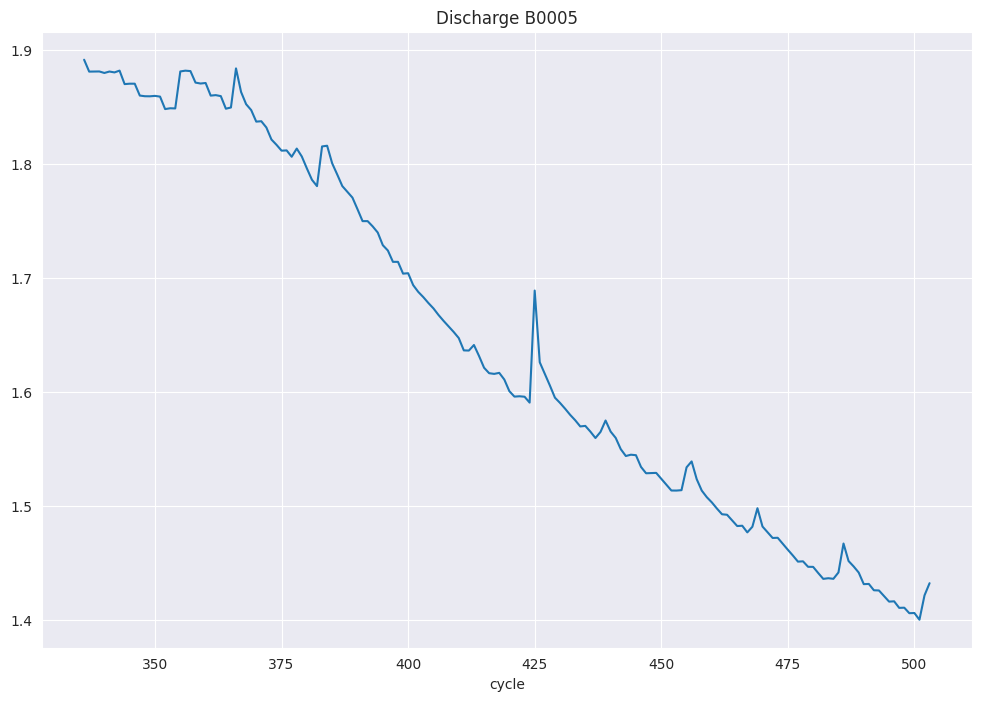

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(B0007['Capacity'].index, B0007['Capacity'])
plt.xlabel('cycle')
plt.title('Discharge B0005')

In [15]:
B0007 = df[df['BatteryLabel'] == "B0007"]

In [32]:
B0007.keys()

Index(['Counter', 'BatteryLabel', 'AmbientTemperature', 'DateTime', 'Capacity',
       'VoltageMeasured', 'CurrentMeasured', 'TemperatureMeasured',
       'CurrentLoad', 'VoltageLoad', 'Time'],
      dtype='object')

In [27]:
cycles_to_plot = [10, 20, 50, 100, 150, 200, 300]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No data for cycle 10.
No data for cycle 20.
No data for cycle 50.
No data for cycle 100.
No data for cycle 150.
No data for cycle 200.
No data for cycle 300.


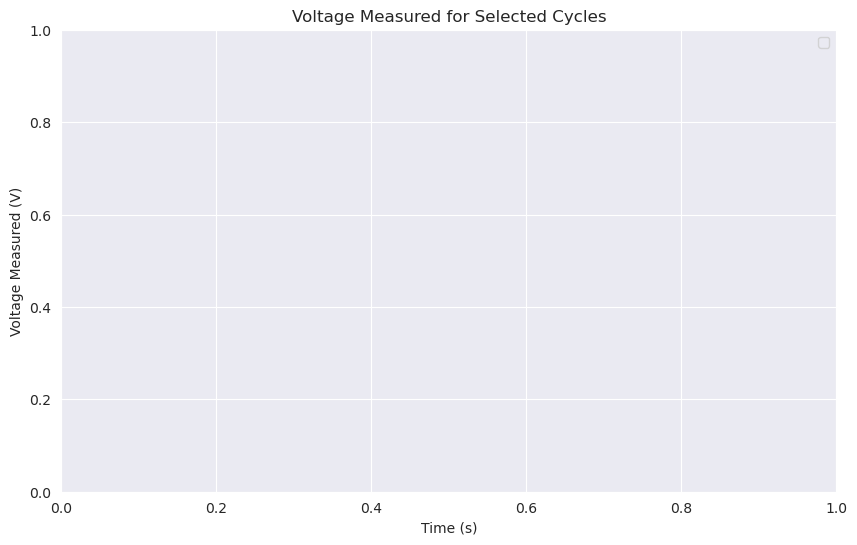

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through the specified cycles and plot each one
for cycle in cycles_to_plot:
    # Filter the DataFrame for the current cycle
    cycle_data = B0007[B0007['Counter'] == cycle]
    
    # Check if the cycle_data DataFrame is empty
    if not cycle_data.empty:
        # Ensure Time is relative to the start of each cycle if it's not already
        # This step assumes 'Time' is continuous and needs to be reset at the start of each cycle
        cycle_data['Time'] -= cycle_data['Time'].iloc[0]
        
        # Plotting
        ax.plot(cycle_data['Time'], cycle_data['VoltageMeasured'], label=f'Cycle {cycle}')
    else:
        print(f"No data for cycle {cycle}.")

ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage Measured (V)')
ax.set_title('Voltage Measured for Selected Cycles')
plt.legend()

plt.show()

In [29]:
df['BatteryLabel'].unique()

array(['B0005', 'B0006', 'B0007'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No data for cycle 10.
No data for cycle 20.
No data for cycle 50.
No data for cycle 100.
No data for cycle 150.
No data for cycle 200.
No data for cycle 300.


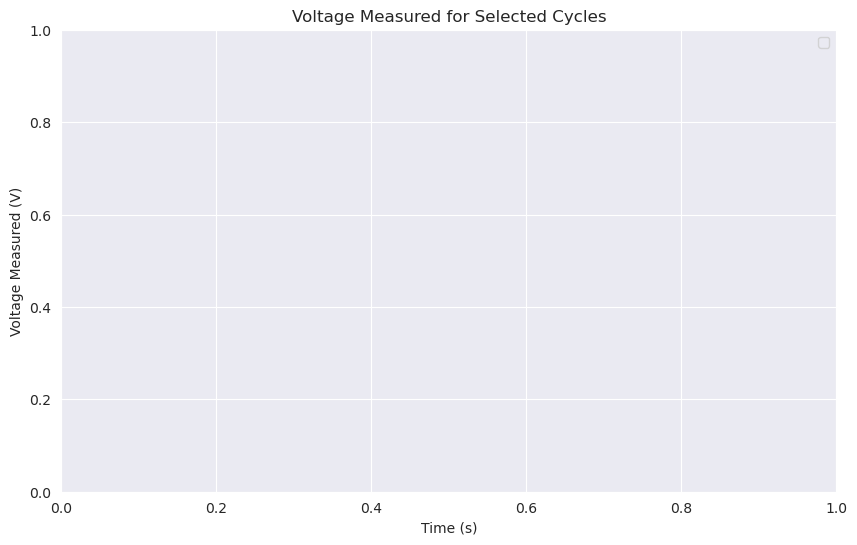

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

for cycle in cycles_to_plot:

    cycle_data = B0007[B0007['Counter'] == cycle]

    if not cycle_data.empty:
        cycle_data['Time'] -= cycle_data['Time'].iloc[0]
        
        # Plotting
        ax.plot(cycle_data['Time'], cycle_data['CurrentMeasured'], label=f'Cycle {cycle}')
    else:
        print(f"No data for cycle {cycle}.")

ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage Measured (V)')
ax.set_title('Voltage Measured for Selected Cycles')
plt.legend()

plt.show()